In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the symptoms from the second file
with open('drive/My Drive/Projects/LSE-Symptomatology/Dataset/symptom_related_lexicon.txt', 'r') as file:
    symptoms_text = file.read()

In [ ]:
# Split the text by commas to get a list of symptoms and preprocess each symptom
all_symptoms_from_txt = [symptom.lower().strip() for symptom in symptoms_text.split(',')]
len(all_symptoms_from_txt)

31949

In [ ]:
# Remove symptoms named "PCOS" or "pcos"
all_symptoms_from_txt = [symptom for symptom in all_symptoms_from_txt if "pcos" not in symptom.lower()]

# Count the number of symptoms after removal
number_of_symptoms_after_removal = len(all_symptoms_from_txt)
number_of_symptoms_after_removal

30478

In [ ]:
# Remove symptoms named "none"
all_symptoms_from_txt = [symptom for symptom in all_symptoms_from_txt if "none" not in symptom.lower()]
# Count the number of symptoms after removal
number_of_symptoms_after_removal = len(all_symptoms_from_txt)
number_of_symptoms_after_removal

30370

In [ ]:
import torch

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from sentence_transformers import SentenceTransformer

with open('BioBERT.txt', 'r') as f:
    model_name = f.read().strip()
model = SentenceTransformer(model_name)
Symptoms_biobert_Embs = model.encode( all_symptoms_from_txt )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.32k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
Symptoms_biobert_Embs[0]

array([-0.04676571,  0.67659837,  0.08452574,  0.6598307 , -0.0282439 ,
       -0.4280581 , -0.30185658, -0.40456763, -0.20834923, -0.20905027,
        0.150095  ,  0.3755451 ,  0.80200785, -0.52053887,  0.91842973,
        0.07047097, -0.34784594, -0.47280234,  0.200911  ,  0.6269934 ,
        0.59519094,  0.0805286 , -0.9671825 , -0.7825896 , -0.11990011,
       -0.48269224,  0.35283297, -0.00570207, -0.27574834,  0.6001013 ,
        0.23312631,  1.4149996 , -0.24731573,  0.08424891, -0.3662642 ,
        0.74200475,  0.6612009 , -0.40309173, -0.06864168, -0.05498581,
       -0.32589096, -0.06480992,  0.11321503, -0.24106273, -0.13714775,
       -0.13793951,  0.32687575, -0.61940324,  0.16470969,  0.51477164,
        0.45316583,  0.37738937,  0.3915304 , -0.32531187,  0.18741925,
       -0.3959429 , -0.10817573, -0.3580502 , -0.36674666,  0.0357326 ,
       -0.13859911,  0.12496654, -0.14310884,  0.1030759 ,  0.30522656,
        0.17211911,  0.49784866, -0.13811329,  0.78560203, -0.81

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

<ipython-input-12-70a9fe88f95b>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Symptoms_biobert_Embs[:, 0], Symptoms_biobert_Embs[:, 1],s=2, cmap='Spectral');


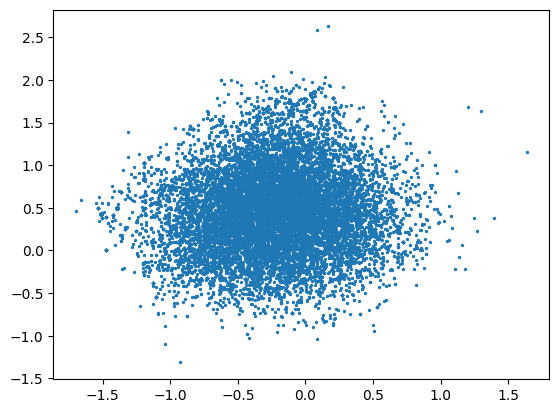

In [ ]:
plt.scatter(Symptoms_biobert_Embs[:, 0], Symptoms_biobert_Embs[:, 1],s=2, cmap='Spectral');

In [ ]:
from sklearn.preprocessing import normalize

# Normalize the embeddings
normalized_embeddings = normalize(Symptoms_biobert_Embs, axis=1)

In [ ]:
matrix=normalized_embeddings

In [ ]:
## Calculate Silhoutte score

def calculate_silhouette_scores(data_matrix, min_clusters, max_clusters):
    cluster_results_km = pd.DataFrame(columns=['k', 'score'])

    for k in tqdm(range(min_clusters, max_clusters + 1)):
        km_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
        y = km_model.fit_predict(data_matrix)
        silhouette = silhouette_score(data_matrix, y)
        dic={'k': [k], 'score': [silhouette]}
        cluster_results_km=pd.concat([cluster_results_km, pd.DataFrame(dic)])

    return cluster_results_km

def find_optimal_cluster(cluster_results):
    cluster_results = cluster_results.reset_index(drop=True)
    optimal_cluster = cluster_results['score'].idxmax()
    optimal_cluster = cluster_results['k'].iloc[optimal_cluster]
    return optimal_cluster

In [ ]:
# Calculate silhouette scores for a range of cluster values
cluster_results = calculate_silhouette_scores(matrix, min_clusters=5, max_clusters=100)

# Find the optimal cluster based on the highest silhouette score
optimal_cluster = find_optimal_cluster(cluster_results)
print("Optimal number of clusters:", optimal_cluster)
print(cluster_results.loc[cluster_results['k'] == optimal_cluster])

In [ ]:
# Calculate silhouette scores for a range of cluster values
cluster_results = calculate_silhouette_scores(matrix, min_clusters=5, max_clusters=100)

# Find the optimal cluster based on the highest silhouette score
optimal_cluster = find_optimal_cluster(cluster_results)
print("Optimal number of clusters:", optimal_cluster)
print(cluster_results.loc[cluster_results['k'] == optimal_cluster])


  0%|          | 0/96 [00:00<?, ?it/s]

<ipython-input-16-31d7f42b8d22>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cluster_results_km=pd.concat([cluster_results_km, pd.DataFrame(dic)])


Optimal number of clusters: 100
     k     score
0  100  0.323482


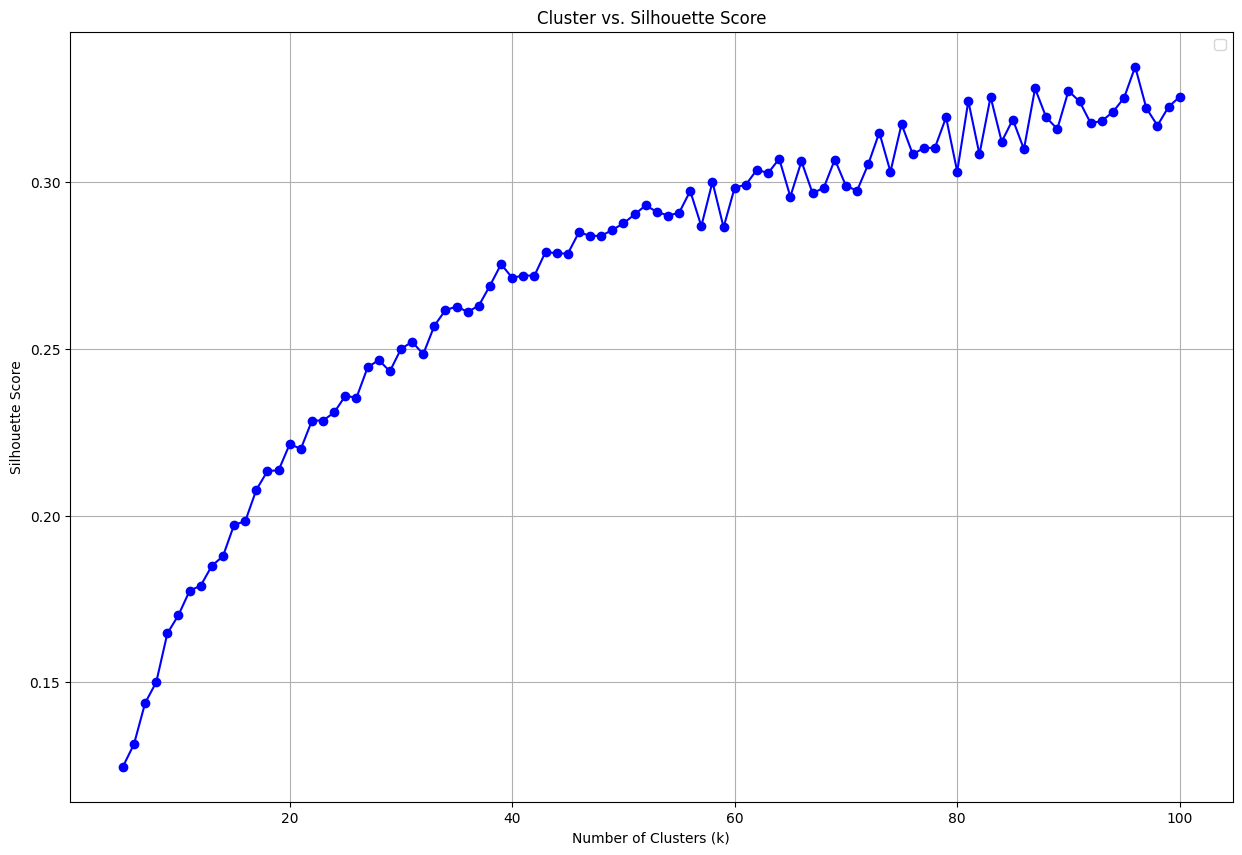

In [ ]:
# Plot cluster vs. silhouette score
plt.figure(figsize=(15, 10))
plt.plot(cluster_results['k'], cluster_results['score'], marker='o', linestyle='-', color='b')
plt.title('Cluster vs. Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
saved_path = 'drive/My Drive/Data/Data Analysis Outcomes/BioBERT Results'
plt.savefig(os.path.join(saved_path, f"Cluster vs. Silhouette Score.png"), format='png', pad_inches=0)
plt.legend()
plt.show()

In [ ]:
# After obtaining cluster_results from calculate_silhouette_scores function
k_value = 96 # Set the specific k value for which you want to retrieve the silhouette score

# Retrieve and print the silhouette score for k
silhouette_score= cluster_results.loc[cluster_results['k'] == k_value, 'score'].values[0]
print(f"Silhouette Score for k={k_value}: {silhouette_score}")

Silhouette Score for k=96: 0.3208868205547333


# SENSITIVITY ANALYSIS

In [ ]:

def calculate_inertia(data_matrix, ks):
   import pandas as pd
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, init='k-means++', random_state=42)
        km.fit(data_matrix)
        inertias.append(km.inertia_)
    return pd.DataFrame({'k': ks, 'inertia': inertias})



In [ ]:
# choose a window around 96
min_k, max_k = 86, 106
ks = list(range(min_k, max_k+1))

# reuse your calculate_silhouette_scores
sens_sil = calculate_silhouette_scores(matrix, min_k, max_k)
sens_inertia = calculate_inertia(matrix, ks)





#BOOTSTRAP STABILITY TEST

In [ ]:

def bootstrap_func(data_matrix, k, n_iter, sample_frac):

    # full-data reference labels
    km_full = KMeans(n_clusters=k, random_state=42).fit(data_matrix)
    ref_labels = km_full.labels_
    ari_list = []
    n_samples = data_matrix.shape[0]
    for i in range(n_iter):
        idx = np.random.choice(n_samples, size=int(n_samples * sample_frac), replace=False)
        km = KMeans(n_clusters=k, random_state=42).fit(data_matrix[idx])
        ari = adjusted_rand_score(ref_labels[idx], km.labels_)
        ari_list.append(ari)
    return np.array(ari_list)




In [ ]:
aris = bootstrap_func(matrix, k=106, n_iter=500, sample_frac=0.8) #change k = 86, 96, 106
print(f"Bootstrapped ARI (k=106): median={np.median(aris):.2f}, "
      f"95% CI=[{np.percentile(aris,2.5):.2f}, {np.percentile(aris,97.5):.2f}]")


Bootstrapped ARI (k=106): median=0.78, 95% CI=[0.75, 0.82]


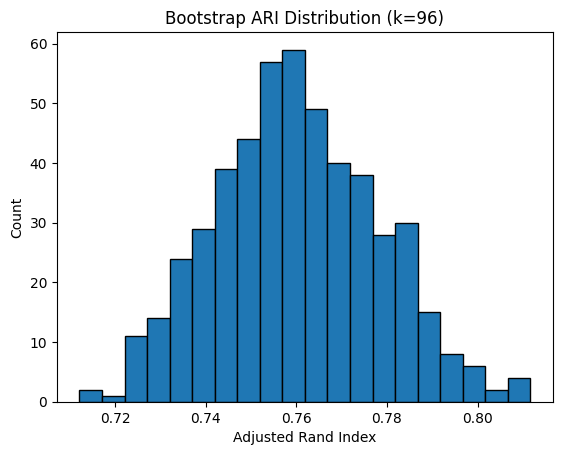

In [ ]:
# optional: histogram of ARI
plt.hist(aris, bins=20, edgecolor='k')
plt.title('Bootstrap ARI Distribution (k=96)')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Count')
plt.show()

In [ ]:
n_clusters = k_value=96
# KMeans clustering on the normalized embeddings
X= matrix
km_model = KMeans(n_clusters =n_clusters, init ='k-means++', random_state = 42)
y = km_model.fit_predict(X)
cluster_labels=y

In [ ]:
from collections import Counter

# Create a dictionary to hold symptoms for each cluster
clusters = {i: [] for i in range(n_clusters)}

# Populate the dictionary with symptoms
for symptom, label in zip(all_symptoms_from_txt, cluster_labels):
    clusters[label].append(symptom)

# Create a dictionary for cluster names
cluster_names = {}

# Assign a name to each cluster based on the most frequent symptom
for cluster, symptoms in clusters.items():
    # Count the frequency of each symptom in the cluster
    symptom_counts = Counter(symptoms)

    # Find the most frequent symptom
    most_frequent_symptom = symptom_counts.most_common(1)[0][0]

    # Assign the name of the most frequent symptom to the cluster
    cluster_names[cluster] = most_frequent_symptom

# Print the symptoms in each cluster with the assigned name
for cluster, symptoms in clusters.items():
    print(f"Cluster {cluster} (named {cluster_names[cluster]}):")
    print(", ".join(symptoms))
    print("\n")

Cluster 0 (named enlarged ovary):
cysts in right ovary, large cyst on left ovary, ultrasound on my ovaries, cyst on ovary, 6.5cm cyst near right ovary, shadow over right ovary, ovarian tumor, size of right ovary, pearl necklace appearance on left ovary, large cyst on ovary, oophorectomy, ovary removal, cyst on ovary, fullness in ovary, 4cm diameter cyst on right ovary, vibrations in left ovary, golf ball sized cyst on right ovary, follicles on right ovary, no cysts in ovaries, highlighted colors around right ovary, little bit above left ovary, cyst on right ovary, left ovary numbers different than right ovary, cyst on ovary, enlarged right ovary, enlarged ovary, twinges in right ovary, twisted ovary, single ovary, swollen left ovary, big cyst in left ovary (2cm), cyst on right ovary, cystic ovary, cyst on right ovary, pressure in right ovary, enlarged ovary, enlarged ovary, twisting ovary, smooshed ovary below other organs, focused on left ovary, cyst on right ovary, enlarged left ovar

In [ ]:
from collections import defaultdict, Counter

# A dictionary to store symptom frequencies for each cluster
cluster_symptom_freq = defaultdict(Counter)

# construct dictionary
for i, symptom in enumerate(all_symptoms_from_txt):
    cluster_label = cluster_labels[i]
    cluster_symptom_freq[cluster_label][symptom] += 1

# Display the symptom frequency for each cluster
for cluster, freqs in sorted(cluster_symptom_freq.items()):
    print(f"Cluster {cluster + 1}: {cluster_freq[cluster]} symptoms")
    for symptom, freq in freqs.most_common(15):
      print(f"{symptom}: {freq}")
    print("\n")


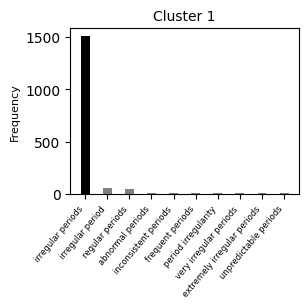

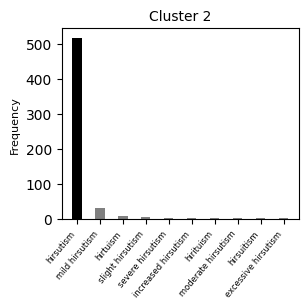

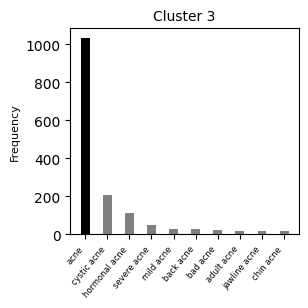

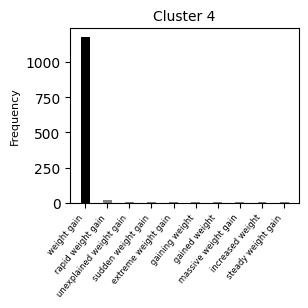

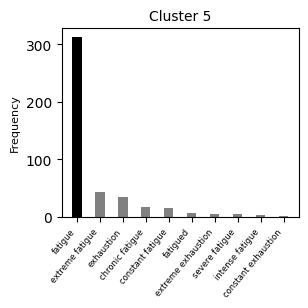

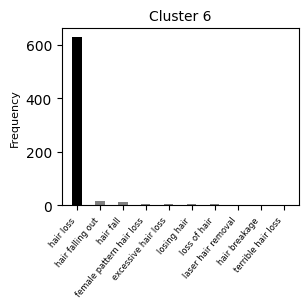

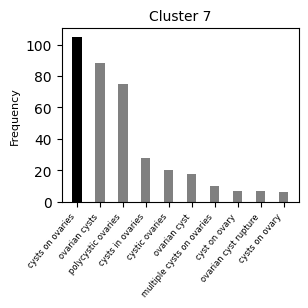

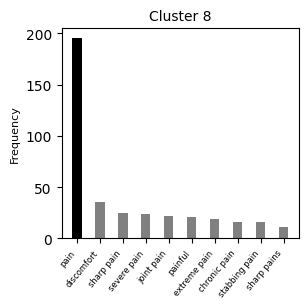

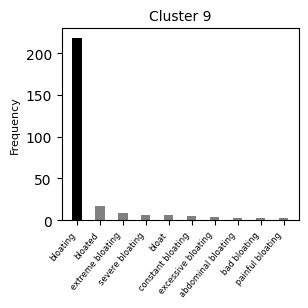

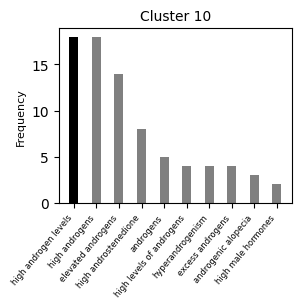

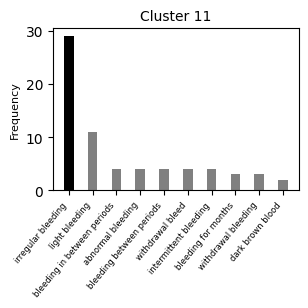

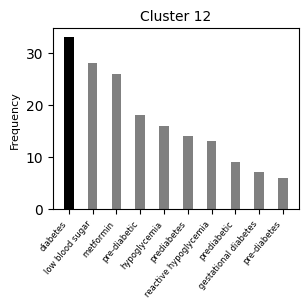

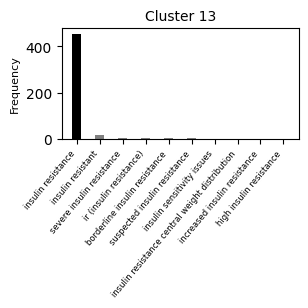

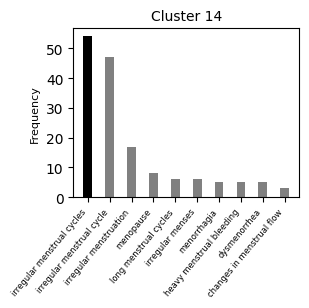

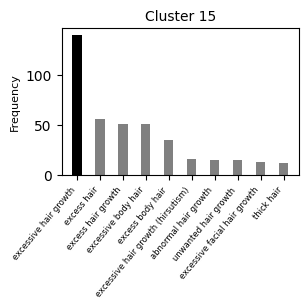

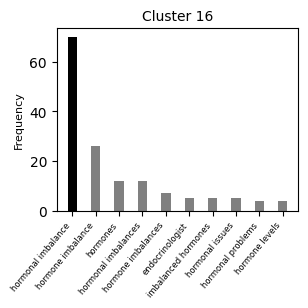

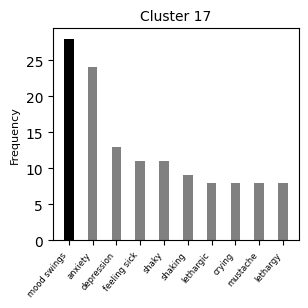

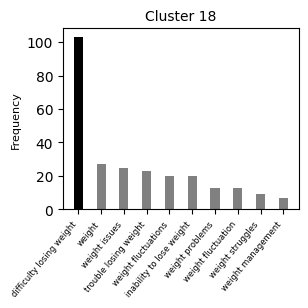

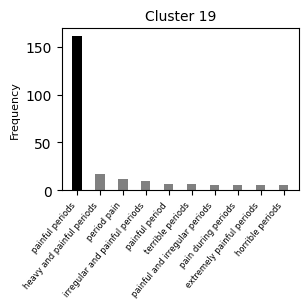

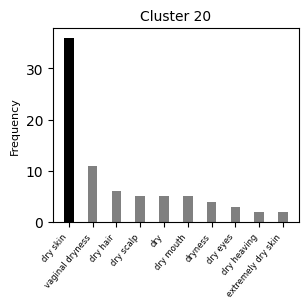

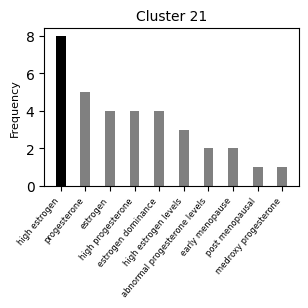

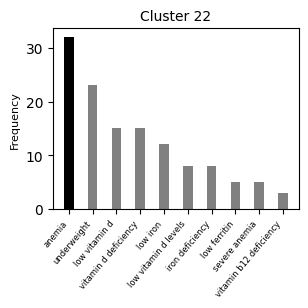

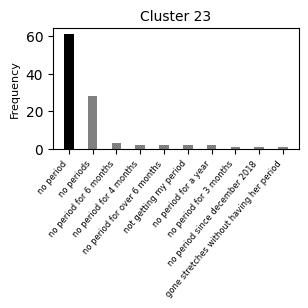

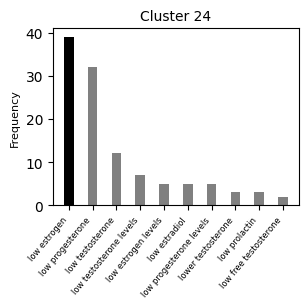

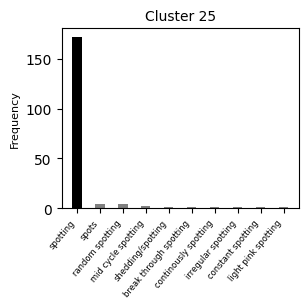

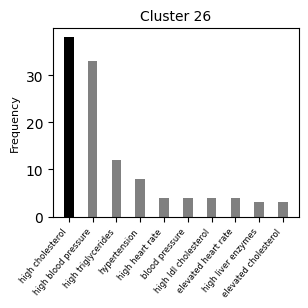

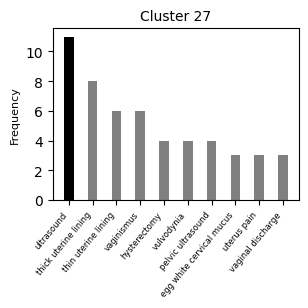

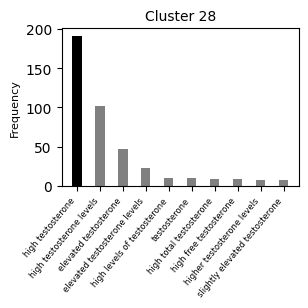

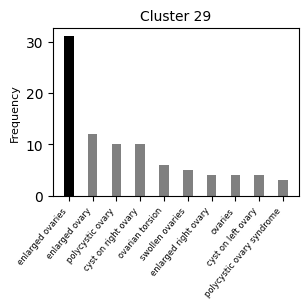

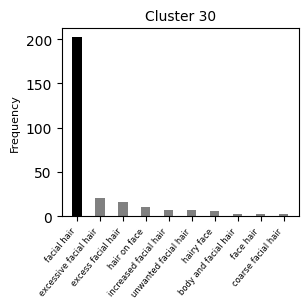

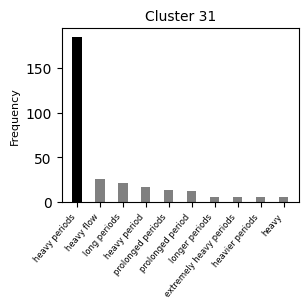

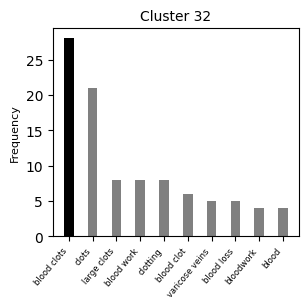

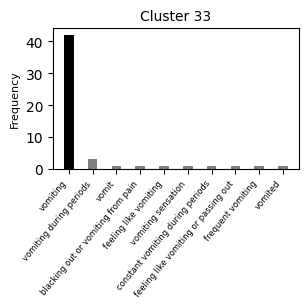

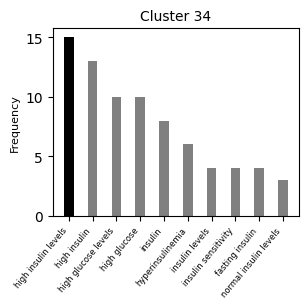

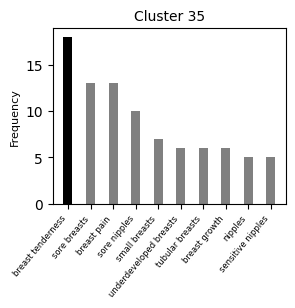

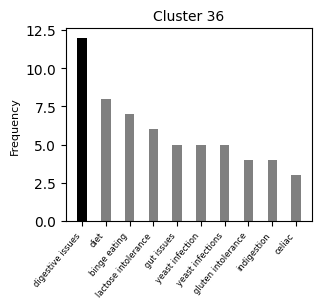

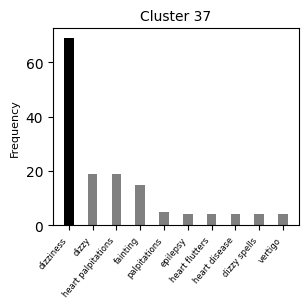

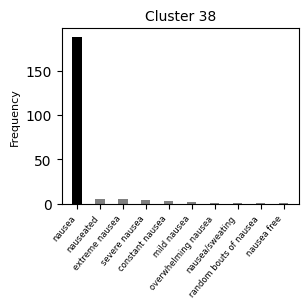

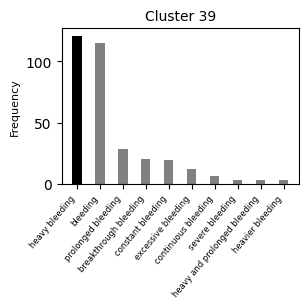

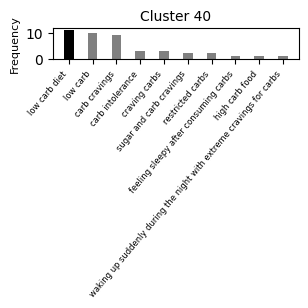

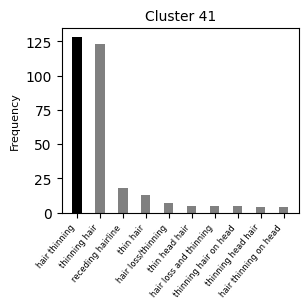

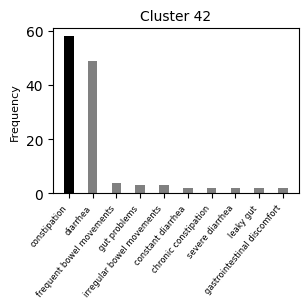

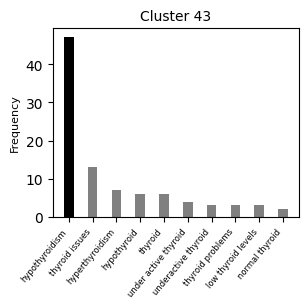

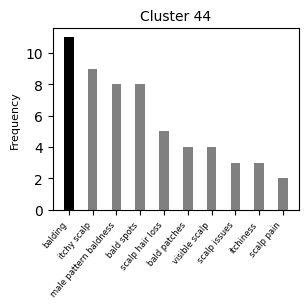

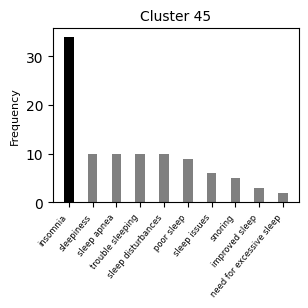

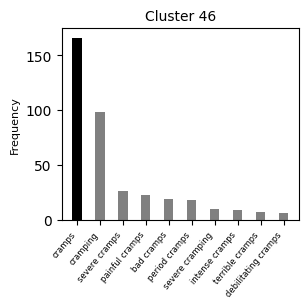

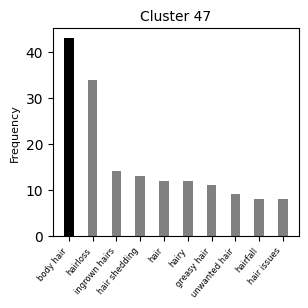

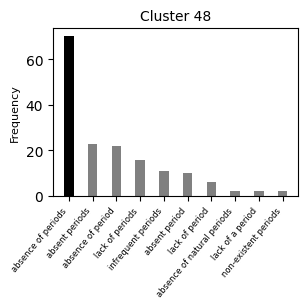

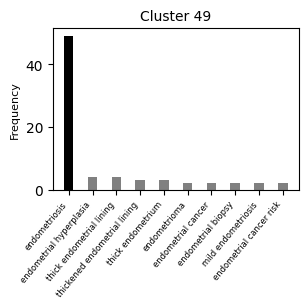

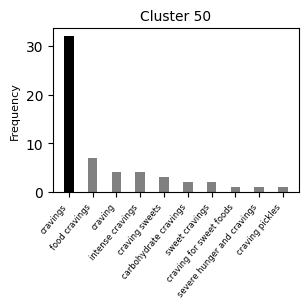

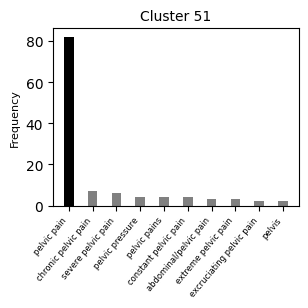

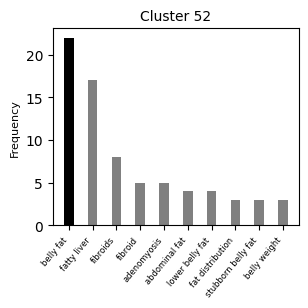

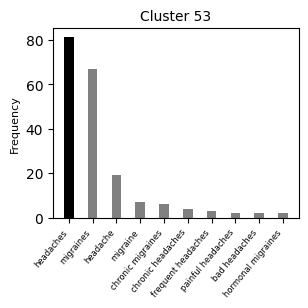

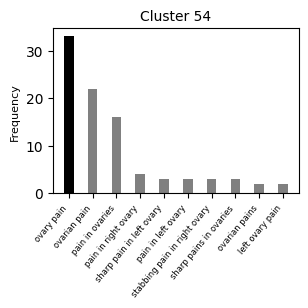

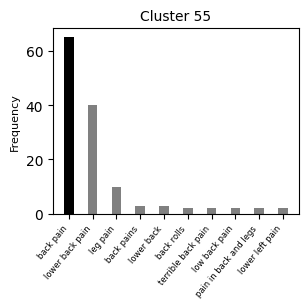

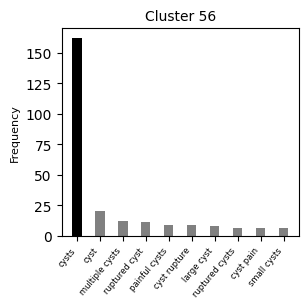

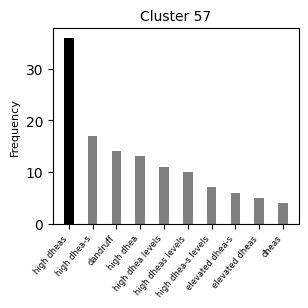

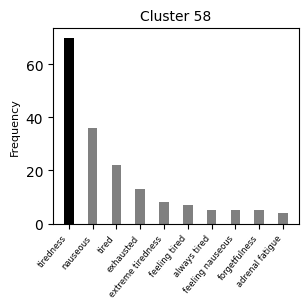

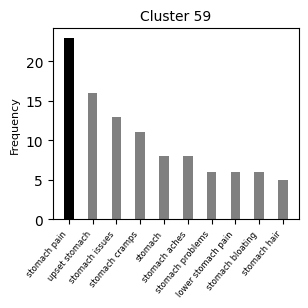

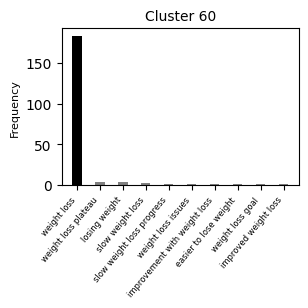

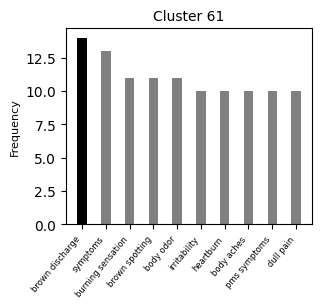

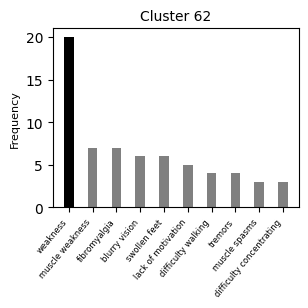

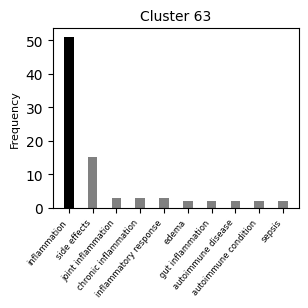

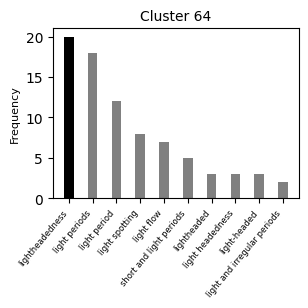

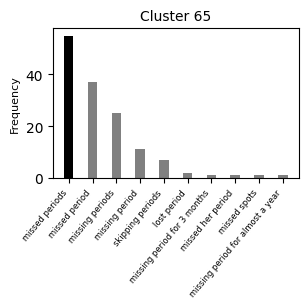

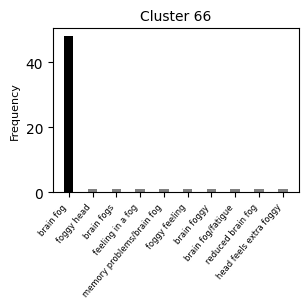

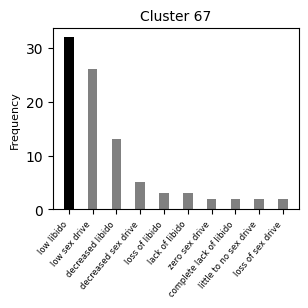

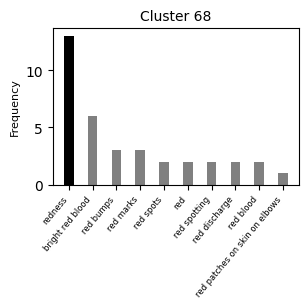

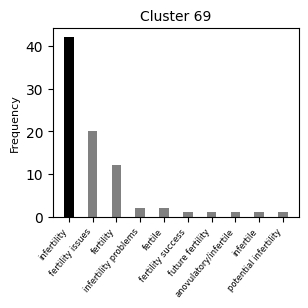

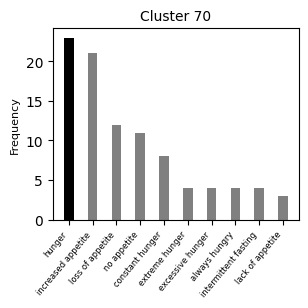

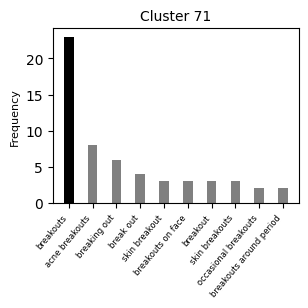

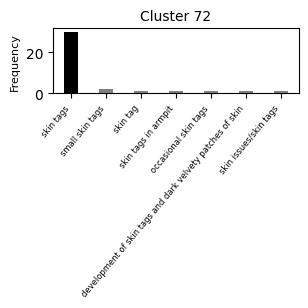

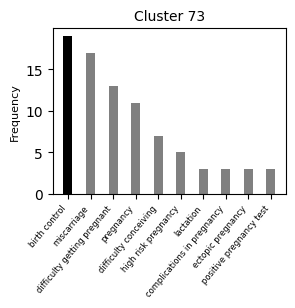

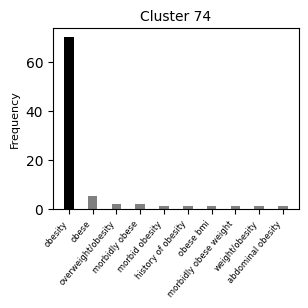

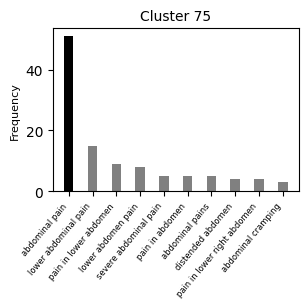

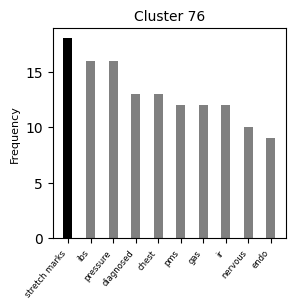

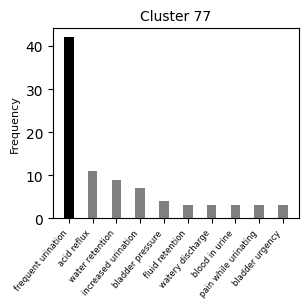

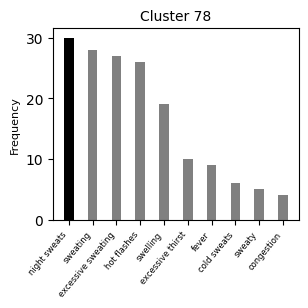

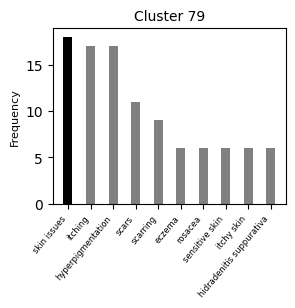

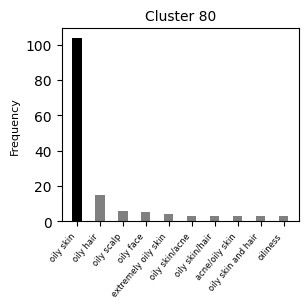

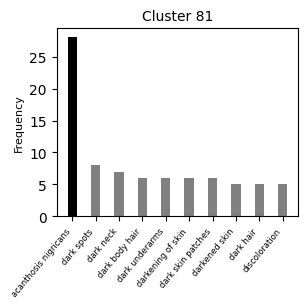

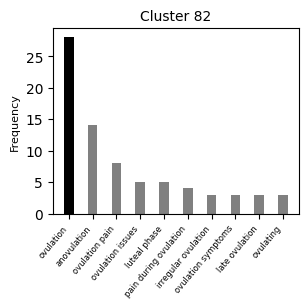

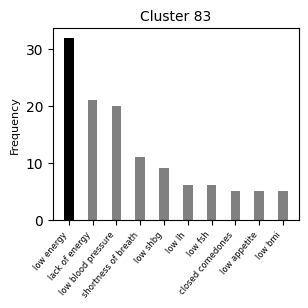

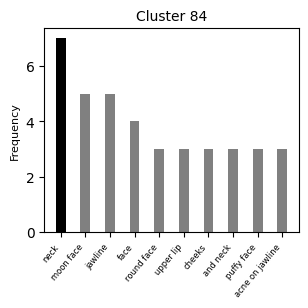

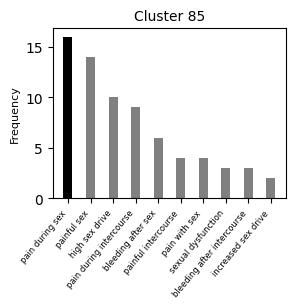

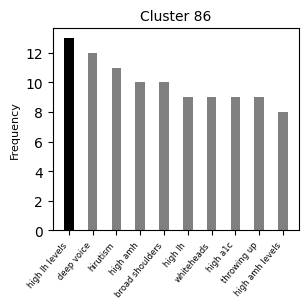

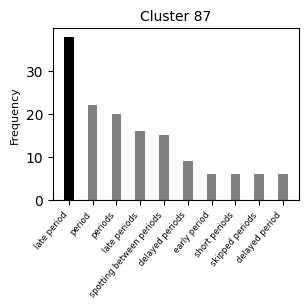

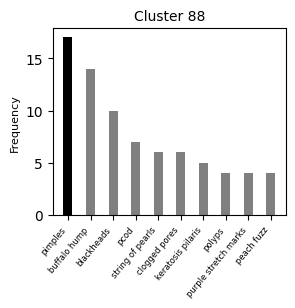

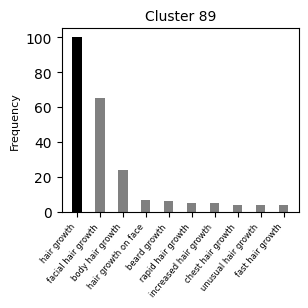

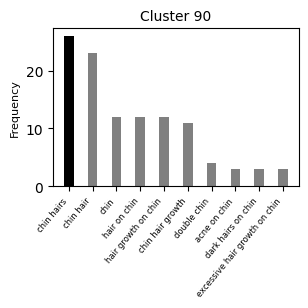

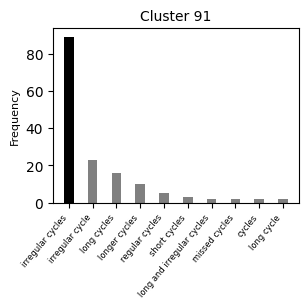

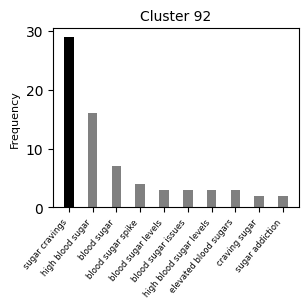

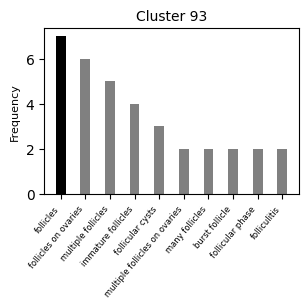

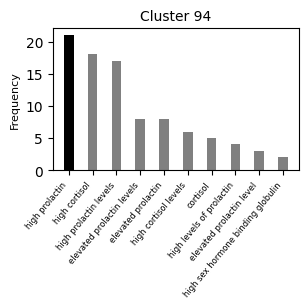

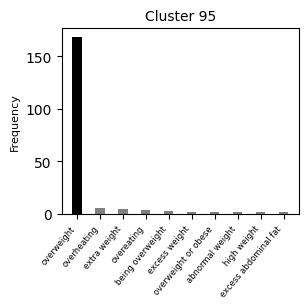

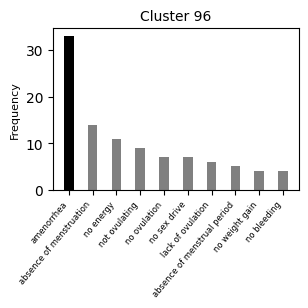

In [ ]:
import os
import matplotlib.pyplot as plt

# Define colors (black for the first bar, grey for others)
colors = ['black'] + ['grey'] * 9  # Adjust as needed

# For each cluster, plot its top 5 symptoms
for cluster, freqs in sorted(cluster_symptom_freq.items()):
    # Extract the top 5 symptoms and their frequencies
    symptoms = [symptom for symptom, _ in freqs.most_common(10)]
    frequencies = [freqs[symptom] for symptom in symptoms]

    # Plot the bar chart with customized bar colors and widths
    plt.figure(figsize=(3, 3))
    plt.bar(symptoms, frequencies, color=colors, width=0.4)  # Adjust width as needed
    plt.ylabel('Frequency', fontsize=8)  # Use smaller font size
    plt.title(f'Cluster {cluster + 1}', fontsize=10)  # Use smaller font size
    plt.xticks(rotation=50, ha='right', fontsize=6)  # Rotate symptom names with smaller font size
    plt.tight_layout(pad=0.4)  # Reduce the gap between two consecutive charts

    # Save the figure in SVG format
    saved_path = 'drive/My Drive/LSE-Symptomatology/Data/Cluster_Bar_charts(k-means)/'
    plt.savefig(os.path.join(saved_path, f"Cluster{cluster + 1}.svg"), format='svg', bbox_inches='tight')
    plt.show()


In [ ]:
# Display the least frequent symptom distribution for each cluster
for cluster, freqs in sorted(cluster_symptom_freq.items()):
    print(f"Cluster {cluster + 1}: {cluster_freq[cluster]} symptoms")
    for symptom, freq in freqs.most_common()[:-11:-1]:
        print(f"{symptom}: {freq}")
    print("\n")

Cluster 1: 554 symptoms
occasional missed cycles: 1
period every two weeks: 1
periods usually last: 1
only having 3 cycles in the last year: 1
not having regular periods: 1
period all over the place: 1
48 day cycle: 1
randomly last year: 1
breakouts on lower half of face: 1
twice every: 1


Cluster 2: 1902 symptoms
increase in acne scars: 1
acne trouble: 1
facial/body acne: 1
hairline acne: 1
no acne breakouts: 1
cystic acne along jaw line: 1
acne on center of forehead: 1
scalp acne: 1
acne on jawline/cheeks/chin: 1
acne resurfacing: 1


Cluster 3: 268 symptoms
hormone driven: 1
imbalanced fsh/lh levels: 1
hypothalamic amenorrhea: 1
adrenal gland function: 1
messed up hormones: 1
adrenal/hormonal belly: 1
problems with hormonal imbalance: 1
hormone drop: 1
balances hormones: 1
metabolic imbalance: 1


Cluster 4: 1276 symptoms
weight gain in belly area: 1
quick weight gain: 1
weight gain (especially in the stomach): 1
substantial weight gain: 1
stubborn weight gain: 1
extremely rapid we